<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare Data</a></span></li></ul></div>

In [36]:
import numpy as np
from sklearn.datasets import make_blobs
import random
import matplotlib.pyplot as plt

# Prepare Data

Ground data:  (105, 2)
Query data:  (3, 2)
Private data:  (2, 2)


Text(0.5, 1.0, 'Black = ground data, Yellow = query data, Red = private data')

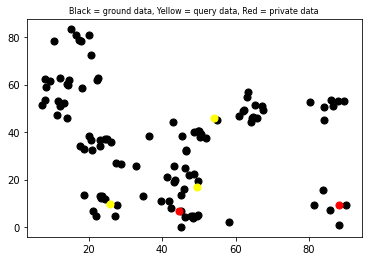

In [39]:
num_points = 110
num_clusters = 18
cluster_std = 3
num_queries = 3
num_privates = 2
num_ground = 105
# X, y, centers = make_blobs(n_samples=num_points, centers=num_clusters, n_features=2, 
#                            cluster_std=cluster_std, center_box=(0,100), 
#                            random_state=2, return_centers=True)
X, y, centers = make_blobs(n_samples=[2, 2, 2, 1, 3, 1, 6, 7, 7, 6, 6, 6, 10, 11, 10, 10, 11, 9], 
                           centers=None, n_features=2, cluster_std=cluster_std, 
                           center_box=(0,100), random_state=2, return_centers=True)
XMinusQueryPrivate = list(map(tuple, X)) 
assert(len(centers)==num_clusters)
query_private_idx = []
query_private_features = []
random.seed(10)
random_clusters = random.sample(range(num_clusters),num_queries+num_privates)
for c in range(num_queries+num_privates): 
    crand = random_clusters[c]
    qp_ind = y.tolist().index(crand) #find the ind of first point that belongs to cluster crand
    query_private_idx.append(qp_ind)
    query_private_features.append(tuple(X[qp_ind]))
    XMinusQueryPrivate.remove(tuple(X[qp_ind]))
omega = list(map(tuple, X))
ground_data = np.array(XMinusQueryPrivate)
query_data = np.array(query_private_features[:3])
private_data = np.array(query_private_features[-2:])
cluster_assign = y.tolist()
print("Ground data: ", ground_data.shape)
print("Query data: ", query_data.shape)
print("Private data: ", private_data.shape)
ground_data_x, ground_data_y = ground_data.T
query_data_x, query_data_y = query_data.T
private_data_x, private_data_y = private_data.T
#plt.scatter(ground_data_x, ground_data_y, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(ground_data_x, ground_data_y, s=50, color='black', label="Images")
plt.scatter(query_data_x, query_data_y, s=50, color='yellow', label = "Queries")
plt.scatter(private_data_x, private_data_y, s=50, color='red', label = "Privates")
plt.title("Black = ground data, Yellow = query data, Red = private data", fontsize=8)

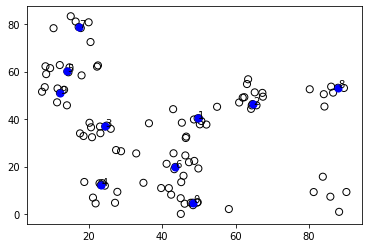

In [44]:
from submodlib import FacilityLocationFunction
objFL = FacilityLocationFunction(n=num_ground, data=ground_data, mode="dense", metric="euclidean")
greedyList = objFL.maximize(budget=10,optimizer='NaiveGreedy', stopIfZeroGain=False, stopIfNegativeGain=False, verbose=False)
greedyXs = [ground_data_x[x[0]] for x in greedyList]
greedyYs = [ground_data_y[x[0]] for x in greedyList]
plt.scatter(ground_data_x, ground_data_y, s=50, facecolors='none', edgecolors='black', label="Images")
plt.scatter(greedyXs, greedyYs, s=50, color='blue', label="Greedy Set")
for label, element in enumerate(greedyList):
    plt.annotate(label, (ground_data_x[element[0]], ground_data_y[element[0]]), (ground_data_x[element[0]]+0.1, ground_data_y[element[0]]+0.1))